#### overlapping_objects test

In [1]:
import numpy as np
import xarray as xr


from netCDF4 import Dataset

import scipy
from scipy import ndimage
from scipy.ndimage import label


import matplotlib.pyplot as plt

from Tracking_Functions import overlapping_objects

In [2]:
%%time
flnm = '/glade/campaign/mmm/c3we/mingge/FRONTIERS/OBJS/Regular_0.44/CERRA/201001_CERRA_ObjectMasks__dt-3h_MOAAP-masks.nc'
            
ncid = Dataset(flnm, mode='r')
PR   = np.squeeze(ncid.variables['PR'])
Lat=np.squeeze(ncid.variables['lat'][:])
Lon=np.squeeze(ncid.variables['lon'][:])

Cloud_obj = np.array(np.squeeze(ncid.variables['BT_Objects']), dtype=np.float16)
CY_obj    = np.squeeze(ncid.variables['CY_Objects'][:])

obj_PR           = overlapping_objects(Cloud_obj, CY_obj, PR)
obj_PR_NoOverlap = overlapping_objects(CY_obj,    CY_obj, PR)
          
ncid.close() 
                

/glade/u/home/mingge/miniforge3/envs/casper_2023/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


CPU times: user 6.15 s, sys: 563 ms, total: 6.71 s
Wall time: 7.28 s


/glade/derecho/scratch/mingge/tmp/ipykernel_23933/2743303134.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(Lon, Lat, np.sum(obj_PR_NoOverlap, axis=0) - np.sum(obj_PR, axis=0), vmin=-100, vmax=100)


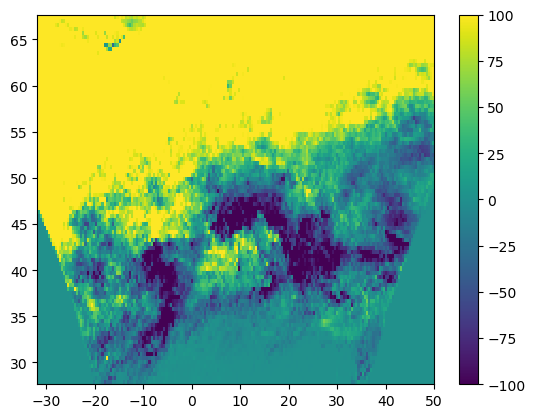

In [3]:
plt.pcolormesh(Lon, Lat, np.sum(obj_PR_NoOverlap, axis=0) - np.sum(obj_PR, axis=0), vmin=-100, vmax=100)
plt.colorbar() ;